<a href="https://colab.research.google.com/github/dcair2024/vet/blob/main/C%C3%B3pia_de_Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("clientes_churn.csv")
df.head()

,idade,tempo_contrato,tipo_plano,total_gasto,suporte_tecnico_usado,churn
0,56,16,Básico,3841.67,Não,0
1,69,39,Padrão,786.55,Sim,1
2,46,5,Básico,4355.49,Sim,0
3,32,22,Padrão,2488.41,Sim,1
4,60,29,Premium,4483.31,Sim,1


In [ ]:
X=df.drop(columns=["churn"])
y=df["churn"]

In [ ]:
X=pd.get_dummies(X)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
modelo=RandomForestClassifier(n_estimators=100,random_state=42)
modelo.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
importancias=modelo.feature_importances_
atributos=X.columns

In [ ]:
df_importancias=pd.DataFrame({"Atributos":atributos,"Importancias":importancias})
df_importancias=df_importancias.sort_values(by="Importancias",ascending=False)

In [ ]:
df_importancias.head()


,Atributos,Importancias
2,total_gasto,0.350531
1,tempo_contrato,0.289212
0,idade,0.283171
3,tipo_plano_Básico,0.018292
5,tipo_plano_Premium,0.016221


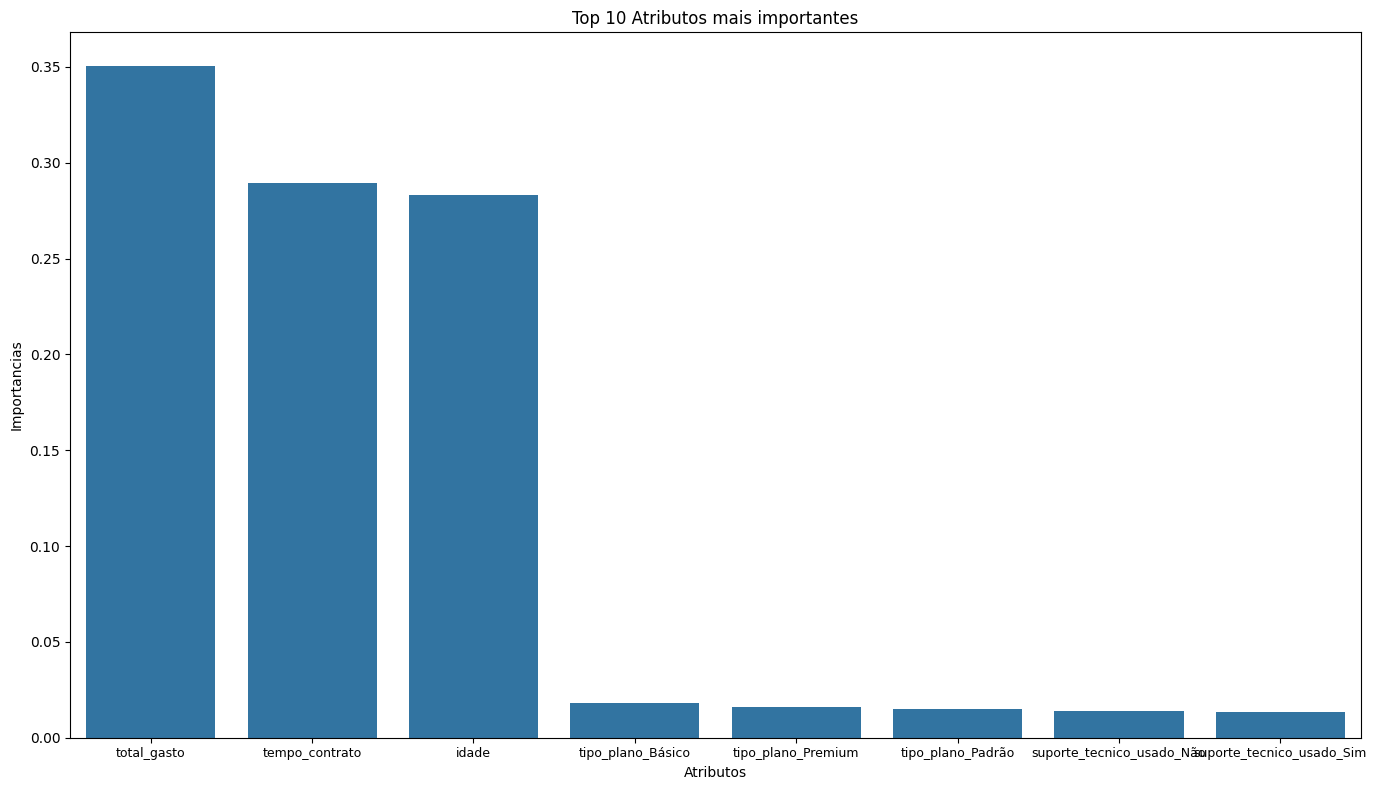

In [ ]:
plt.figure(figsize=(14,8))
sns.barplot(x="Atributos",y="Importancias",data=df_importancias)
plt.title("Top 10 Atributos mais importantes")
plt.xlabel("Atributos")
plt.ylabel("Importancias")
plt.xticks(fontsize=9)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()